In [1]:
import numpy as np
import sys
import os

sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../..'))
import signalConditioning
import visualization
import visualization


In [2]:
#We load in the Raw EEG Signals
path = "../../Data"
files = os.listdir(path)

raw_signals = []
labels = [] 

for file in files[1:]:
     
    raw_signals.append(np.load(f"{path}/{file}"))    


labels_path = path + "/Labels"
print(labels_path)
print(os.listdir(labels_path))

for file in os.listdir(labels_path):
    print(file)
    labels.append(np.load(f"{labels_path}/{file}",allow_pickle=True))

../../Data/Labels
['sub-10_ses-0_labels.npy', 'sub-10_ses-10_labels.npy', 'sub-10_ses-11_labels.npy', 'sub-10_ses-12_labels.npy', 'sub-10_ses-13_labels.npy', 'sub-10_ses-14_labels.npy', 'sub-10_ses-1_labels.npy', 'sub-10_ses-2_labels.npy', 'sub-10_ses-3_labels.npy', 'sub-10_ses-4_labels.npy', 'sub-10_ses-5_labels.npy', 'sub-10_ses-6_labels.npy', 'sub-10_ses-7_labels.npy', 'sub-10_ses-8_labels.npy', 'sub-10_ses-9_labels.npy', 'sub-11_ses-0_labels.npy', 'sub-11_ses-10_labels.npy', 'sub-11_ses-11_labels.npy', 'sub-11_ses-12_labels.npy', 'sub-11_ses-13_labels.npy', 'sub-11_ses-14_labels.npy', 'sub-11_ses-1_labels.npy', 'sub-11_ses-2_labels.npy', 'sub-11_ses-3_labels.npy', 'sub-11_ses-4_labels.npy', 'sub-11_ses-5_labels.npy', 'sub-11_ses-6_labels.npy', 'sub-11_ses-7_labels.npy', 'sub-11_ses-8_labels.npy', 'sub-11_ses-9_labels.npy', 'sub-1_ses-0_labels.npy', 'sub-1_ses-10_labels.npy', 'sub-1_ses-11_labels.npy', 'sub-1_ses-12_labels.npy', 'sub-1_ses-13_labels.npy', 'sub-1_ses-14_labels.npy', 

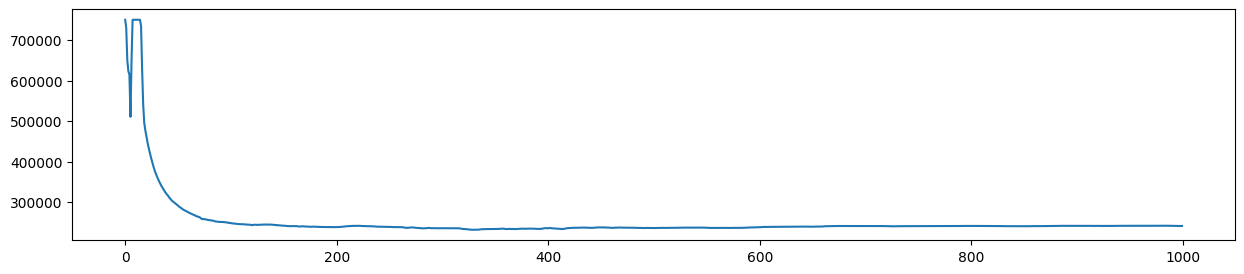

In [16]:
visualization.plotEEG(raw_signals[0][0][0:1000],(15,3))

##### **We will now start with the cleaning process of the signals, starting by applying a passband filter to remove unwanted frequencies** #####

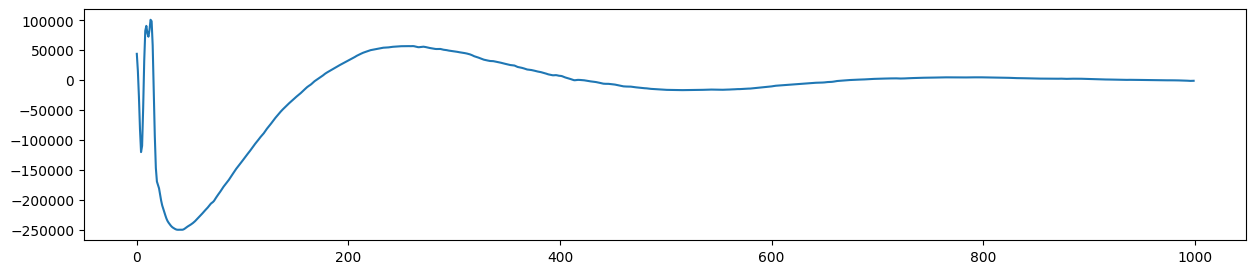

In [17]:
#Since the bandpass function only filters one EEG signal, we will loop through all out EEG Signals, and filter them accordingly

#We will iterate each of our signals, and apply the filters for each one 

data = [signalConditioning.bandPassFilter(x,fs=250) for x in raw_signals]

visualization.plotEEG(data[0][0][0:1000],(15,3))

##### **Now that we've applied the bandpass filter we will now apply a notch filter to remove the interferences from the electricity** #####

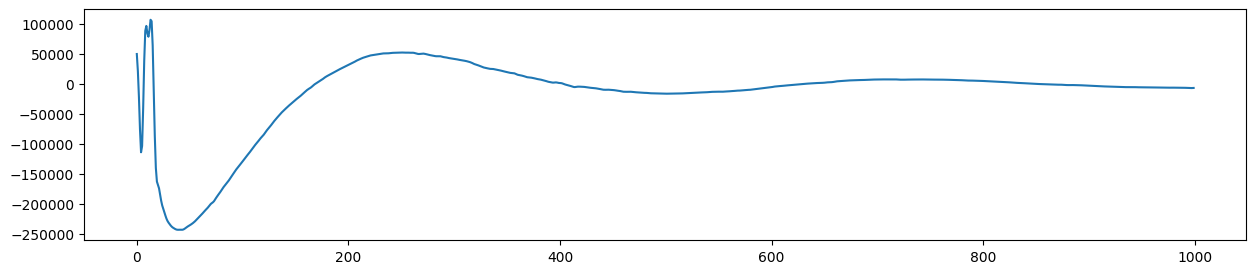

In [19]:
data = [signalConditioning.notchFilter(x,250) for x in data]
visualization.plotEEG(data[0][0][0:1000],(15,3))

##### **Now we will apply mean referencing to remove the common noise in between each of the channels** ######

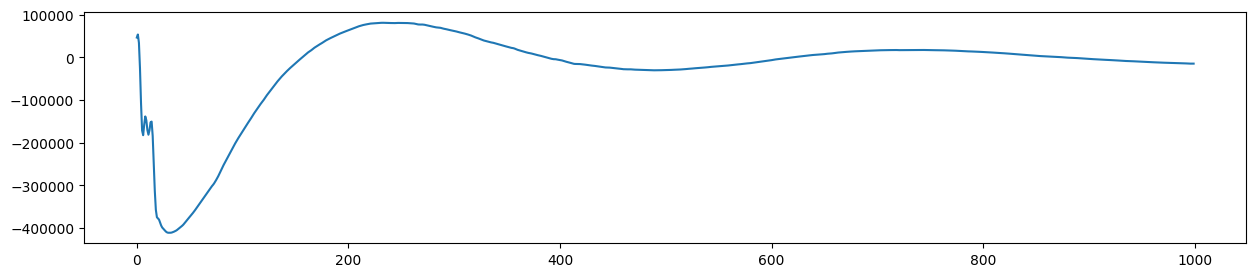

In [23]:
data = [signalConditioning.mean_referencing(x) for x in data]

visualization.plotEEG(data[0][0][0:1000],(15,3))

##### **We will now scale the signal so that the time series can be comparable** ####

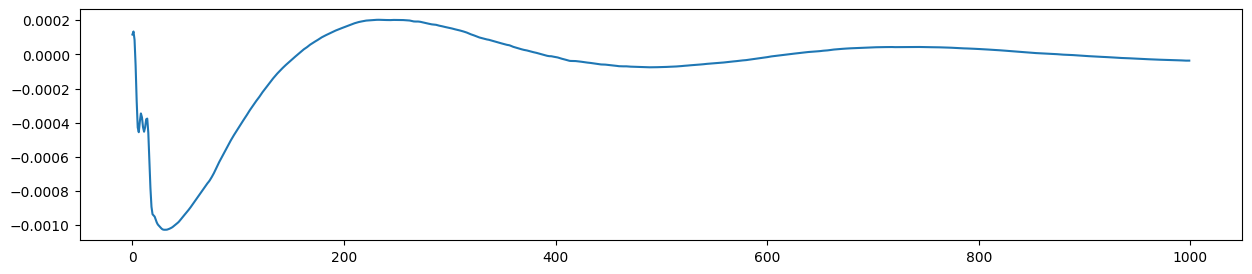

In [26]:
data = [signalConditioning.scale_signal(x) for x in data]

visualization.plotEEG(data[0][0][0:1000],(15,3))

#### **Now we will normalize the signal so that the models and more complex methods can learn better** ####

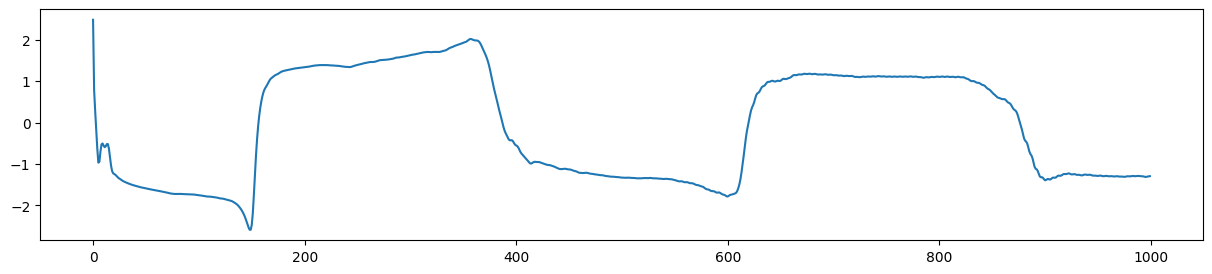

In [27]:
data = [signalConditioning.normalize(x) for x in data]

visualization.plotEEG(data[0][0][0:1000],(15,3))